In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# load stage PS
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
gather_df_3 = gather_dir_metrics(class_dirs[0], 1)     
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[3], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df_3.columns[i] and 'Median' not in gather_df_3.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df_3.columns[i]]
metric_names = list(gather_df_3.columns.values[col_indices])

gather_df_3 = gather_df_3[metric_names]
gather_df_3 = gather_df_3.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts_3 = get_mean_median_comps(gather_df_3, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_3 = get_agg_comp(mm_comp_dicts_3, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models_3 = get_overlap(agg_comp_dict_3, N=1)

In [2]:
# load stage CV
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5
gather_df_2 = gather_dir_metrics(class_dirs[0], k)     
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[1], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[2], 20))
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[3], k))
gather_df_2 = gather_df_2[metric_names]
gather_df_2 = gather_df_2.dropna(axis=0)

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts_2 = get_mean_median_comps(gather_df_2, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_2 = get_agg_comp(mm_comp_dicts_2, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models_2 = get_overlap(agg_comp_dict_2, N=1)

---
## Compare Model Orderings

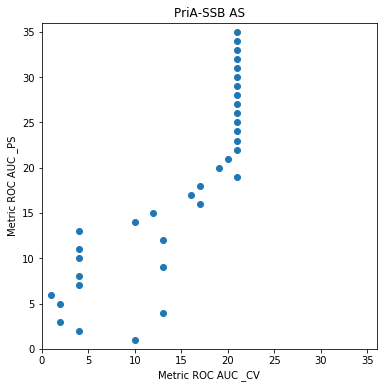

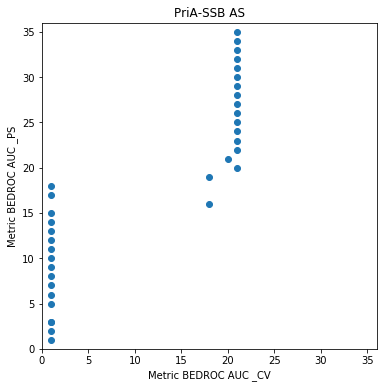

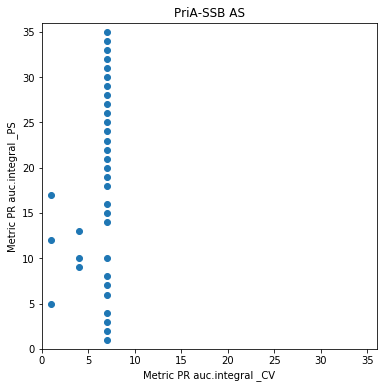

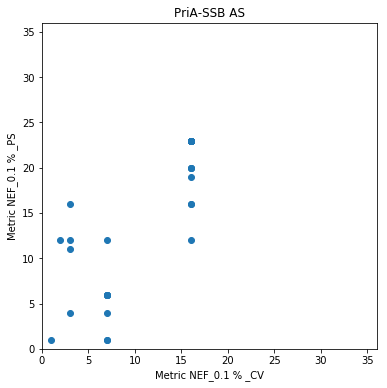

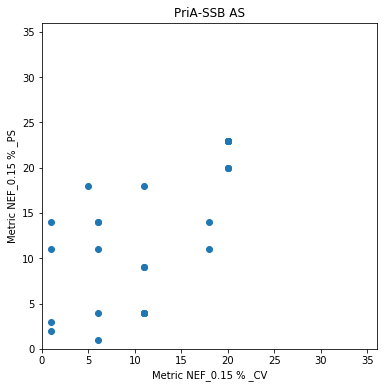

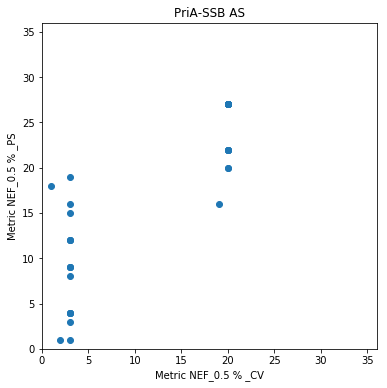

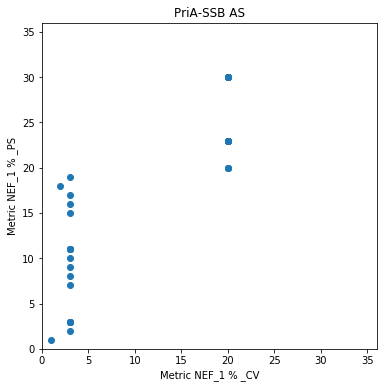

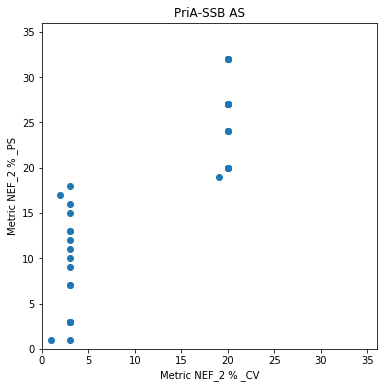

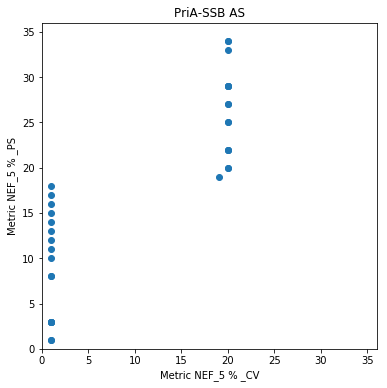

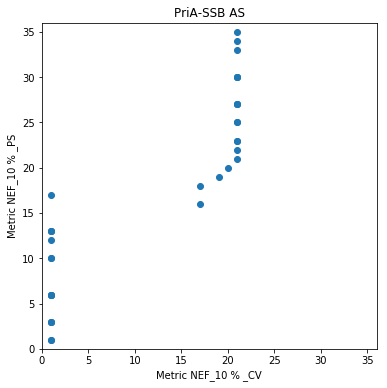

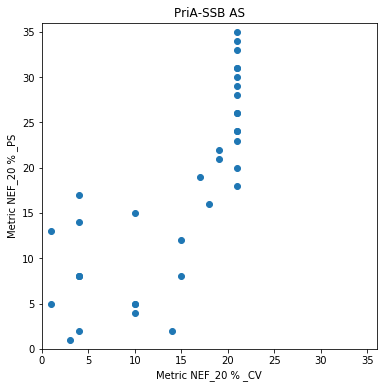

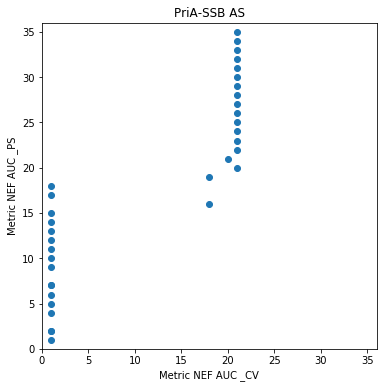

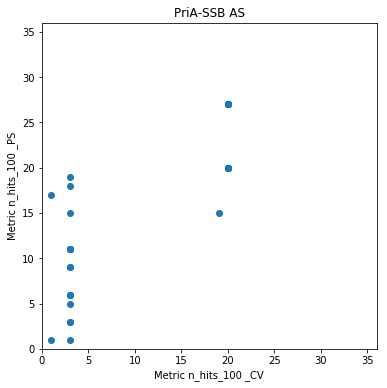

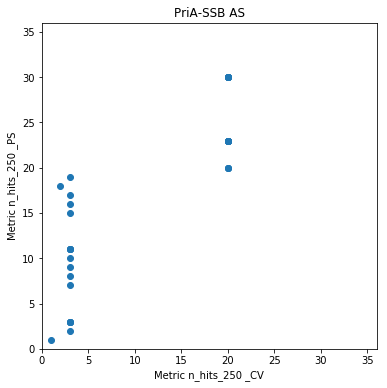

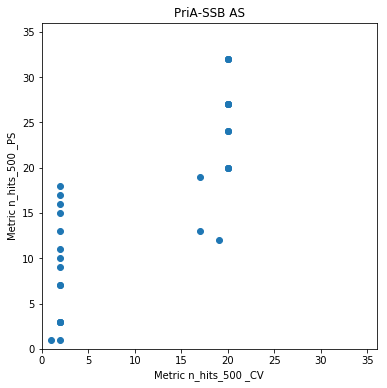

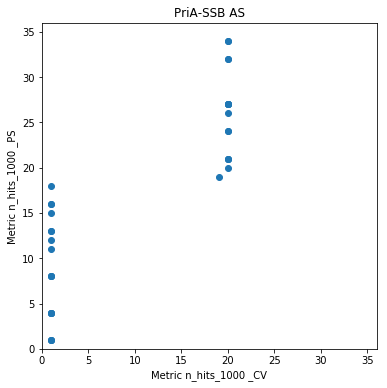

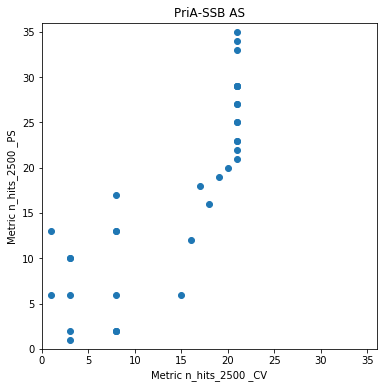

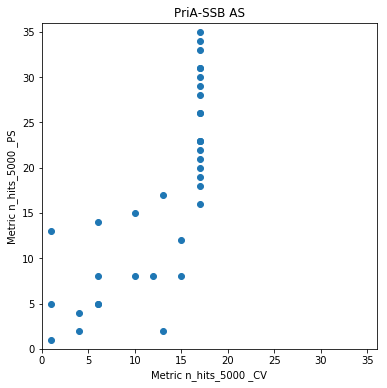

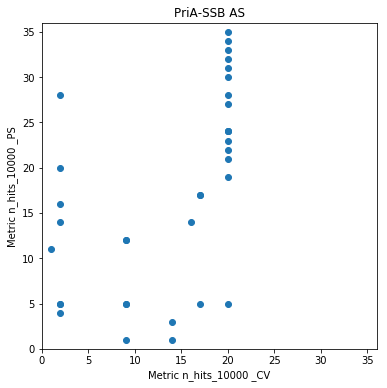

In [3]:
winscore_df_2 = get_model_winscores(agg_comp_dict_2, metric_names)
winscore_df_3 = get_model_winscores(agg_comp_dict_3, metric_names)
winscore_spearman_df = compare_cv_ps_model_ranking(winscore_df_2, winscore_df_3)
plot_comparison_cv_ps(winscore_df_2, winscore_df_3, './cv_ps_figures/cv_ps_model_ordering_comparison/')

In [4]:
winscore_spearman_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.9004,0.8901,0.3092,0.8065,0.8252,0.8538,0.8506,0.862,0.8794,0.9081,0.8471,0.8901,0.8587,0.8506,0.8831,0.8799,0.874,0.8524,0.6465


---
## Overlapping top 1 and top 5 models over all metrics

In [5]:
overlapping_models_2 

,overlap_perc
RandomForest_h,0.5789
SingleClassification_a,0.4737
MultiClassification_b,0.4211
SingleRegression_b,0.4211
SingleClassification_b,0.4211
IRV_e,0.3684
RandomForest_d,0.3158
SingleRegression_a,0.3158
MultiClassification_a,0.3158
RandomForest_f,0.2632


In [6]:
overlapping_models_3

,overlap_perc
RandomForest_h,0.5789
RandomForest_g,0.4211
SingleRegression_a,0.2105
RandomForest_f,0.1053
SingleClassification_b,0.0526
IRV_e,0.0526
RandomForest_e,0.0526
RandomForest_d,0.0526
SingleRegression_b,0.0526


In [7]:
get_overlap(agg_comp_dict_2, N=5)

,overlap_perc
MultiClassification_b,0.8947
SingleRegression_b,0.8421
SingleClassification_a,0.7895
RandomForest_c,0.7895
RandomForest_d,0.7368
MultiClassification_a,0.7368
SingleClassification_b,0.7368
RandomForest_b,0.7368
RandomForest_a,0.7368
RandomForest_h,0.7368


In [8]:
get_overlap(agg_comp_dict_3, N=5)

,overlap_perc
RandomForest_e,0.9474
RandomForest_h,0.8947
RandomForest_g,0.8421
RandomForest_d,0.6842
RandomForest_c,0.5263
SingleRegression_a,0.4737
RandomForest_b,0.4211
RandomForest_a,0.4211
RandomForest_f,0.3684
SingleRegression_b,0.2105


---
## Spearman's Ranking Comparison

In [9]:
spearman_df_2, ordered_spearman_df_2 = get_spearman_r(agg_comp_dict_2, metric_names[:-7], metric_names[-7:])
spearman_df_3, ordered_spearman_df_3 = get_spearman_r(agg_comp_dict_3, metric_names[:-7], metric_names[-7:])
diff_df, ordered_diff_df, spearman_df = compare_spearman_r(spearman_df_2, spearman_df_3)
diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,3.7011e-02,0.0284,0.0355,0.0062,0.0338,0.0653,0.1855
BEDROC AUC,1.9037e-03,0.0004,0.0001,0.0002,0.0325,0.0986,0.1362
PR auc.integral,4.8508e-01,0.5026,0.4872,0.4950,0.4932,0.4592,0.6205
NEF_0.1 %,1.5923e-01,0.1076,0.1307,0.0420,0.1761,0.2524,0.2220
NEF_0.15 %,2.0124e-02,0.0231,0.0015,0.0365,0.1253,0.2004,0.0404
NEF_0.5 %,2.1850e-02,0.0118,0.0029,0.0130,0.0195,0.0468,0.0097
NEF_1 %,2.1681e-02,0.0000,0.0112,0.0134,0.0257,0.0768,0.0662
NEF_2 %,2.1511e-02,0.0206,0.0349,0.0009,0.0492,0.0840,0.1210
NEF_5 %,1.7201e-02,0.0114,0.0121,0.0116,0.0286,0.0696,0.0684
NEF_10 %,2.3267e-02,0.0286,0.0073,0.0091,0.0460,0.0650,0.1565


In [10]:
ordered_diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF AUC,NEF_1 %,BEDROC AUC,BEDROC AUC,NEF_20 %,NEF_0.5 %,NEF_0.5 %
1,BEDROC AUC,BEDROC AUC,NEF_0.15 %,NEF_20 %,NEF_0.5 %,NEF_10 %,NEF_0.15 %
2,NEF_5 %,NEF AUC,NEF AUC,NEF_2 %,NEF_1 %,ROC AUC,NEF_1 %
3,NEF_0.15 %,NEF_5 %,NEF_0.5 %,NEF AUC,NEF_5 %,NEF_5 %,NEF_5 %
4,NEF_2 %,NEF_0.5 %,NEF_10 %,ROC AUC,BEDROC AUC,NEF_20 %,NEF_2 %
5,NEF_1 %,NEF_2 %,NEF_1 %,NEF_10 %,ROC AUC,NEF_1 %,NEF AUC
6,NEF_0.5 %,NEF_0.15 %,NEF_5 %,NEF_5 %,NEF AUC,NEF_2 %,BEDROC AUC
7,NEF_10 %,ROC AUC,NEF_20 %,NEF_0.5 %,NEF_10 %,BEDROC AUC,NEF_10 %
8,ROC AUC,NEF_10 %,NEF_2 %,NEF_1 %,NEF_2 %,NEF AUC,ROC AUC
9,NEF_20 %,NEF_20 %,ROC AUC,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,NEF_0.1 %


In [11]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.7461,0.8652,0.7811,0.9177,0.8792,0.8301,-0.1926


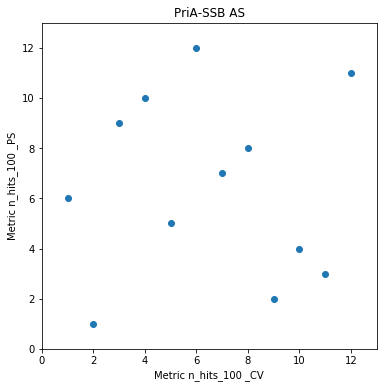

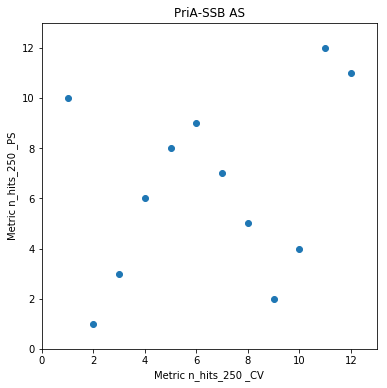

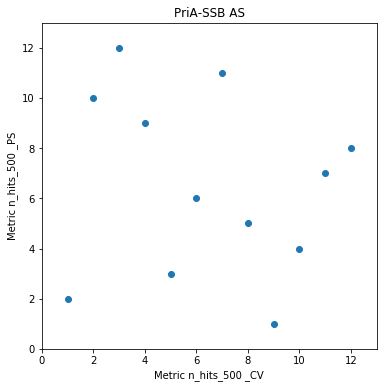

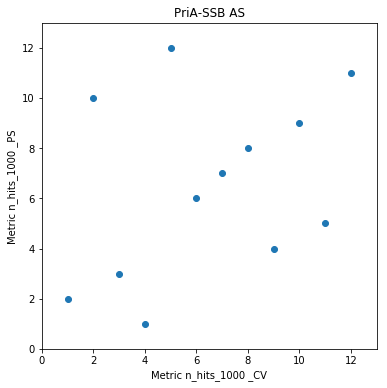

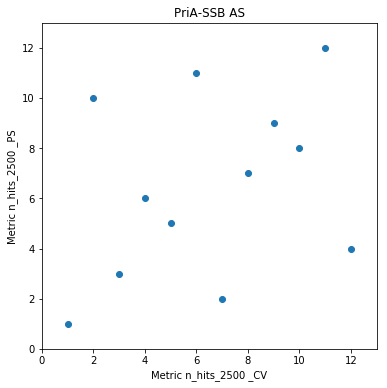

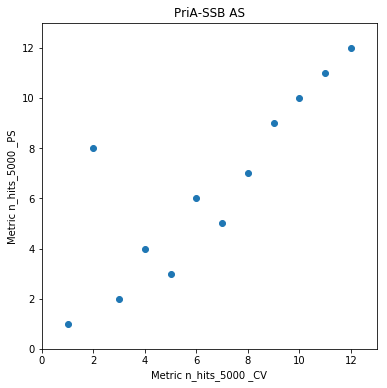

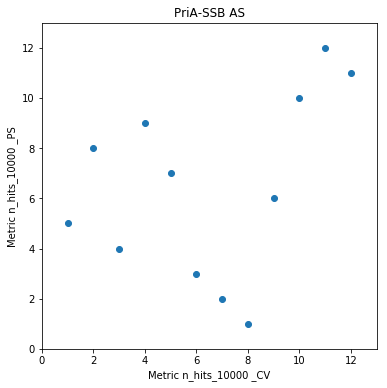

In [12]:
plot_comparison_cv_ps(ordered_spearman_df_2, ordered_spearman_df_3, './cv_ps_figures/cs_ps_scatter_plot_comparison/')